## Image Classification using CNN
### Digit Recogination

In [8]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

In [9]:
train = pd.read_csv("cnntrain.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
test= pd.read_csv("cnntest.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1) 
Y_train.unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

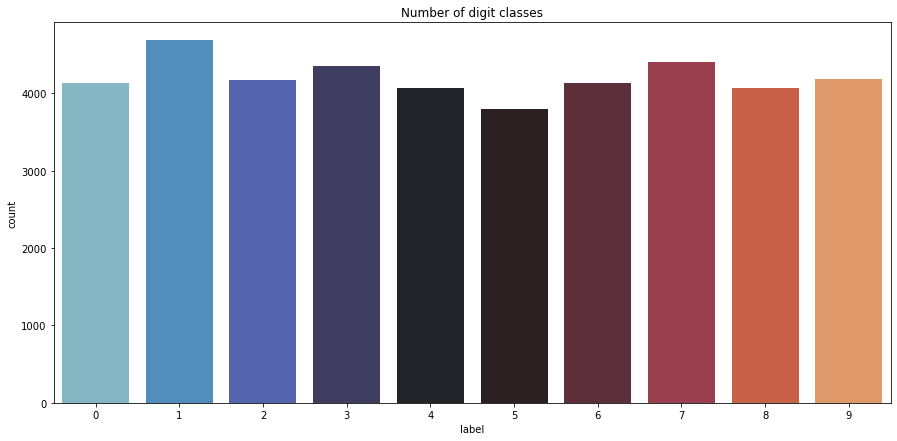

In [48]:
plt.figure(figsize=(15,7))

sns.countplot(x='label',data=train,palette="icefire")
plt.title("Number of digit classes")
# Y_train.value_counts()
plt.show()

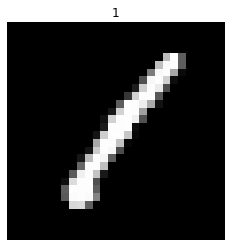

In [24]:
img = np.array(X_train.iloc[0])
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

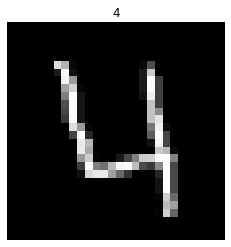

In [25]:
img = np.array(X_train.iloc[3])
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[3,0])
plt.axis("off")
plt.show()

In [26]:
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [27]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [28]:

from keras.utils.np_utils import to_categorical 
Y_train = to_categorical(Y_train, num_classes = 10)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


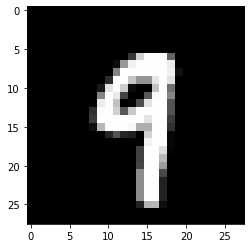

In [30]:
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.show()

In [31]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [32]:

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [33]:

model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [34]:
epochs = 10  
batch_size = 250

In [35]:

datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False, 
        zca_whitening=False, 
        rotation_range=5, 
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False,  
        vertical_flip=False)  

datagen.fit(X_train)

In [36]:

history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 19s 121ms/step - loss: 1.1347 - accuracy: 0.6217 - val_loss: 0.2320 - val_accuracy: 0.9400
Epoch 2/10
151/151 [==============================] - 16s 108ms/step - loss: 0.4462 - accuracy: 0.8596 - val_loss: 0.1266 - val_accuracy: 0.9624
Epoch 3/10
151/151 [==============================] - 16s 105ms/step - loss: 0.3169 - accuracy: 0.9018 - val_loss: 0.1067 - val_accuracy: 0.9671
Epoch 4/10
151/151 [==============================] - 16s 104ms/step - loss: 0.2635 - accuracy: 0.9175 - val_loss: 0.0863 - val_accuracy: 0.9738
Epoch 5/10
151/151 [==============================] - 16s 107ms/step - loss: 0.2359 - accuracy: 0.9285 - val_loss: 0.0746 - val_accuracy: 0.9774
Epoch 6/10
151/151 [==============================] - 16s 109ms/step - loss: 0.2102 - accuracy: 0.9350 - val_loss: 0.0743 - val_accuracy: 0.9783
Epoch 7/10
151/151 [==============================] - 16s 105ms/step - loss: 0.1977 - accuracy: 0.9384 - val_loss: 0.0647 - val_ac

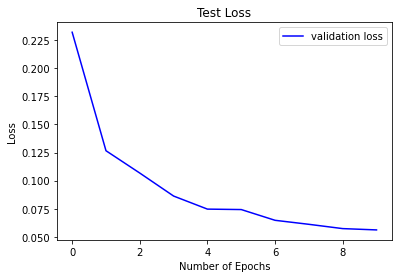

In [37]:
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

132/132 [==============================] - 1s 4ms/step


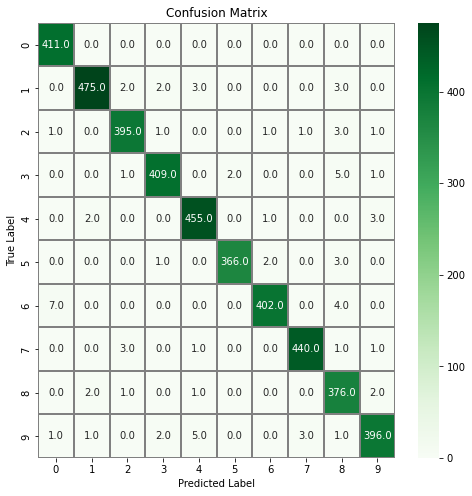

In [38]:
import seaborn as sns
Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_val,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()